In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
X=tf.placeholder(tf.float32,shape=[None,784])
y=tf.placeholder(tf.float32,shape=[None,10])


In [3]:
def weight_variable(shape):
    initial=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)
def bias(shape):
    initial=tf.constant(0.1,shape=shape)
    return tf.Variable(initial)
    

In [4]:
def conv2d(x, W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pool(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

  

In [5]:
W_conv1=weight_variable([5,5,1,32])
b_conv1=bias([32])
X_image=tf.reshape(X,[-1,28,28,1])
h_conv1=tf.nn.relu(conv2d(X_image,W_conv1)+b_conv1)
h_pool1=max_pool(h_conv1)

In [6]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool(h_conv2)

In [7]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [8]:
w4=weight_variable([1024,10])
b4=bias([10])
y_conv= tf.matmul(h_fc1,w4)+b4

In [9]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
import sklearn.preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder
def randomshuffle(train):
    #np.random.shuffle(train)
    train=shuffle(train)
    train_features=train.iloc[:,1:]
    train_labels=train.iloc[:,0]
    labels = LabelEncoder().fit_transform(train_labels)[:, None]
    labels = OneHotEncoder().fit_transform(labels).todense()
    
    
    '''a = np.array(train_labels)
    label_binarizer = sklearn.preprocessing.LabelBinarizer()
    label_binarizer.fit(range(max(a)+1))
    b = label_binarizer.transform(a)
    train_labels=b'''
    return train_features,labels

In [11]:
dataframe= pd.read_csv('../input/train.csv')
train,test=train_test_split(dataframe,test_size=0.05,random_state=1)

In [12]:
train_features,train_labels=randomshuffle(train)
print(train_labels.shape,train_features.shape)

(39900, 10) (39900, 784)


In [13]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [14]:
train_features=train_features/255.0

In [15]:
print("iteration begins")
costs=[]
for i in range(20):
    j=0
    train_features,train_labels=randomshuffle(train)
    batch_cost=0
    for j in range(399):
        x=train_features.iloc[(j%400)*100:((j+1)%400)*100,:]
        y_=train_labels[(j%400)*100:((j+1)%400)*100,:]
        _,cost_batch=sess.run([train_step,cross_entropy],feed_dict={X:x,y:y_})
        batch_cost+=cost_batch/399.0
        if(j==398):
            costs.append(batch_cost)
        if j%100==0:
            print('on minibatch iteration ',j)
            
    if i%2==0:
         print("iteration= ",i)
        
   
        
        
        

iteration begins
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
iteration=  0
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
iteration=  2
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
iteration=  4
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
iteration=  6
on minibatch iteration  0
on minibatch iteration  100
on minibatch iteration  200
on minibatch iteration  300
on minibatch iteration  0
on minibatch iteratio

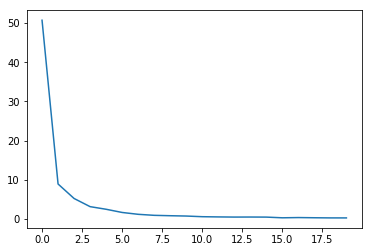

In [16]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show()

In [17]:
test_features,test_labels=randomshuffle(test)
print("accuracy= ",sess.run(accuracy,{X:test_features,y:test_labels}))

accuracy=  0.98


In [18]:
test_set=pd.read_csv("../input/test.csv")

In [19]:
test_result=[]
for i in range(280):
    df1=test_set.iloc[i*100:(i+1)*100,:]
    ans=tf.argmax(y_conv, 1)
    y1,pred=sess.run([y_conv,ans],{X:df1})
    for j in range(len(pred)):
        test_result.append(pred[j])
print(len(test_result))

28000


In [20]:
test_result=np.array(test_result)

In [21]:
labels=[]
for x in range (1,28001):
    labels.append(x)
labels=np.array(labels)

In [22]:
df={
    'ImageId':labels,
    'Label':test_result
}
print(len(labels),len(test_result))
pd_df=pd.DataFrame(data=df)
pd_df.to_csv('tf_cnn.csv',index=False)

28000 28000
